<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Firm Selection

In [92]:
#Select the frim for the prediction
firm = "AAPL"

# Apple -> AAPL
# Microsoft -> MSFT
# Nvidia -> NVDA
# Adobe -> ADVE
# Tesla -> TSLA
# Amazon -> AMZN
# Netflix -> NFLX
# Meta -> META
# Alphabet -> GOOGL

# Data Collection

### Stock Price

In [114]:
import yfinance as yf

# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Display
df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-07 00:00:00-05:00,78.318447,78.568680,77.256774,77.749954,117684000,0.1925,0.0
2020-02-10 00:00:00-05:00,76.328715,78.119225,76.248546,78.119225,109348800,0.0000,0.0
2020-02-11 00:00:00-05:00,78.617278,78.690158,77.429269,77.647919,94323200,0.0000,0.0
2020-02-12 00:00:00-05:00,78.099807,79.496746,78.099807,79.491890,113730400,0.0000,0.0
2020-02-13 00:00:00-05:00,78.760610,79.253790,78.556537,78.925812,94747600,0.0000,0.0
...,...,...,...,...,...,...,...
2025-01-31 00:00:00-05:00,247.190002,247.190002,233.440002,236.000000,101075100,0.0000,0.0
2025-02-03 00:00:00-05:00,229.990005,231.830002,225.699997,228.009995,73063300,0.0000,0.0
2025-02-04 00:00:00-05:00,227.250000,233.130005,226.649994,232.800003,45067300,0.0000,0.0


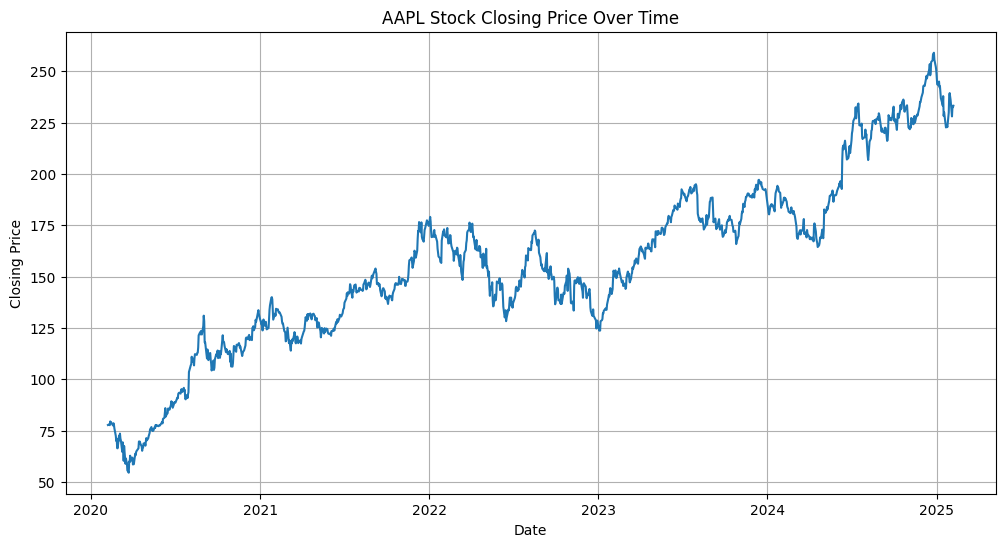

In [109]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [95]:
!pip install fredapi

In [96]:
from fredapi import Fred
import pandas as pd

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
1913-01-01,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-08-01,NaN,4.2,255.463,710038.0,103.0135,1379.0,19905.0,-71156.0,NaN,67.9
2024-09-01,NaN,4.1,252.684,716388.0,102.5969,1355.0,20044.1,-84333.0,NaN,70.1
2024-10-01,29700.58,4.1,253.022,720393.0,102.0854,1344.0,20134.5,-74153.0,NaN,70.5
2024-11-01,NaN,4.2,253.150,725925.0,102.2549,1294.0,20253.6,-78940.0,NaN,71.8


### Microeconomic Indicators

In [125]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2024-09-30,0.0,0.241,134661000000.0,93736000000.0,11445000000.0,210352000000.0,134661000000.0,123216000000.0,NaN,NaN,...,-1046000000.0,-5144000000.0,-3788000000.0,-2266000000.0,11688000000.0,NaN,NaN,11445000000.0,11445000000.0,93736000000.0
2023-09-30,0.0,0.147,125820000000.0,96995000000.0,11519000000.0,214137000000.0,125820000000.0,114301000000.0,-183000000.0,3933000000.0,...,-1618000000.0,-417000000.0,-1688000000.0,-2227000000.0,10833000000.0,NaN,NaN,11519000000.0,11519000000.0,96995000000.0
2022-09-30,0.0,0.162,130541000000.0,99803000000.0,11104000000.0,223546000000.0,130541000000.0,119437000000.0,-106000000.0,2931000000.0,...,1484000000.0,-9343000000.0,-1823000000.0,1006000000.0,9038000000.0,895000000.0,895000000.0,11104000000.0,11104000000.0,99803000000.0
2021-09-30,0.0,0.133,123136000000.0,94680000000.0,11284000000.0,212981000000.0,123136000000.0,111852000000.0,198000000.0,2645000000.0,...,-2642000000.0,-14028000000.0,-10125000000.0,-4921000000.0,7906000000.0,-4774000000.0,-4774000000.0,11284000000.0,11284000000.0,94680000000.0
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890000000.0,2873000000.0,...,NaN,NaN,NaN,NaN,NaN,-215000000.0,-215000000.0,NaN,NaN,NaN


In [127]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Interest Income Non Operating',
 'Operating Income',
 'Operating Expense',
 'Research And Development',
 'Selling General And Administr

### Sentiment Analysis